### Problem Statement:-

**The company wants to know:**

$1.$ Which variables are significant in predicting the price of a house

$2.$ How well those variables describe the price of a house.

In [1]:
#Importing important libraraies
import pandas as pd
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import statistics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/Volumes/BINAY B/1A-IIITB-UpGrad/EPGP ML C54/Machine learning-2/Assignment - Advanced Regression')

In [2]:
#plt.style.available
#setting dataframe column view to 300 columns
pd.set_option('display.max_columns',300)

### Loading and understanding dataset

In [3]:
#loading dataset
housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#removing id feature as it dont have any influence on dataset
housing.drop(labels='Id', axis=1, inplace=True)

In [5]:
#shape of the dataset
housing.shape

(1460, 80)

In [6]:
#information about dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#identifying features with NAN values
null_features = []
for feature in housing.columns:
    if housing[feature].isnull().sum()>0:
        null_features.append(feature)
null_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
#chekcing null value featurs
housing[null_features].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
#chekcing level counts for the the features with null_values
housing['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [11]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [13]:
housing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [14]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<font style= 'color: blue'>Following features with record value 0 is mentioned as NA, these are treated as NAN values in pandas ,this can be confirmed using data dictionary. </font><br>
- PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual

In [16]:
#imputing nan features with respective feature values
housing['PoolQC'].fillna(value='No_Pool', inplace=True)
housing['MiscFeature'].fillna(value='None', inplace=True)
housing['Alley'].fillna(value='No_Alley_access', inplace=True)
housing['FireplaceQu'].fillna(value='No_Fireplace', inplace=True)
housing['Fence'].fillna(value='No_Fence', inplace=True)
housing['GarageYrBlt'].fillna(value=0, inplace=True)

In [17]:
garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in garage:
    housing[i].fillna(value='No_Garage', inplace=True)

In [18]:
basement = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for i in basement:
    housing[i].fillna(value='No_Basement', inplace=True)

In [19]:
#MasVnrArea, MasVnrType have few null values so imputing zero in place of nan values
for i in ['MasVnrArea', 'MasVnrType']:
    housing[i].fillna(value=0, inplace=True)

In [20]:
#removing LotFrontage as it have 17% null values
housing.drop(labels='LotFrontage', axis=1, inplace=True)

In [21]:
#removing entry from datatset where Electrical has only one null value
housing.dropna(inplace=True)

In [22]:
#dataset statistical description for all features
housing.describe(include='all')

MSSubClass MSZoning        LotArea Street            Alley LotShape  \
count   1459.000000     1459    1459.000000   1459             1459     1459   
unique          NaN        5            NaN      2                3        4   
top             NaN       RL            NaN   Pave  No_Alley_access      Reg   
freq            NaN     1150            NaN   1453             1368      924   
mean      56.881426      NaN   10517.363948    NaN              NaN      NaN   
std       42.310746      NaN    9984.666267    NaN              NaN      NaN   
min       20.000000      NaN    1300.000000    NaN              NaN      NaN   
25%       20.000000      NaN    7549.000000    NaN              NaN      NaN   
50%       50.000000      NaN    9477.000000    NaN              NaN      NaN   
75%       70.000000      NaN   11603.000000    NaN              NaN      NaN   
max      190.000000      NaN  215245.000000    NaN              NaN      NaN   

       LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
count         1459      1459      1459      1459         1459       1459   
unique           4         2         5         3           25          9   
top            Lvl    AllPub    Inside       Gtl        NAmes       Norm   
freq          1310      1458      1051      1381          225       1259   
mean           NaN       NaN       NaN       NaN          NaN        NaN   
std            NaN       NaN       NaN       NaN          NaN        NaN   
min            NaN       NaN       NaN       NaN          NaN        NaN   
25%            NaN       NaN       NaN       NaN          NaN        NaN   
50%            NaN       NaN       NaN       NaN          NaN        NaN   
75%            NaN       NaN       NaN       NaN          NaN        NaN   
max            NaN       NaN       NaN       NaN          NaN        NaN   

       Condition2 BldgType HouseStyle  OverallQual  OverallCond    YearBuilt  \
count        1459     1459       1459  1459.000000  1459.000000  1459.000000   
unique          8        5          8          NaN          NaN          NaN   
top          Norm     1Fam     1Story          NaN          NaN          NaN   
freq         1444     1219        726          NaN          NaN          NaN   
mean          NaN      NaN        NaN     6.100069     5.575737  1971.244003   
std           NaN      NaN        NaN     1.383171     1.113079    30.199555   
min           NaN      NaN        NaN     1.000000     1.000000  1872.000000   
25%           NaN      NaN        NaN     5.000000     5.000000  1954.000000   
50%           NaN      NaN        NaN     6.000000     5.000000  1973.000000   
75%           NaN      NaN        NaN     7.000000     6.000000  2000.000000   
max           NaN      NaN        NaN    10.000000     9.000000  2010.000000   

        YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
count    1459.000000      1459     1459        1459        1459       1459   
unique           NaN         6        8          15          16          5   
top              NaN     Gable  CompShg     VinylSd     VinylSd       None   
freq             NaN      1140     1433         514         503        863   
mean     1984.850583       NaN      NaN         NaN         NaN        NaN   
std        20.644343       NaN      NaN         NaN         NaN        NaN   
min      1950.000000       NaN      NaN         NaN         NaN        NaN   
25%      1967.000000       NaN      NaN         NaN         NaN        NaN   
50%      1994.000000       NaN      NaN         NaN         NaN        NaN   
75%      2004.000000       NaN      NaN         NaN         NaN        NaN   
max      2010.000000       NaN      NaN         NaN         NaN        NaN   

         MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
count   1459.000000      1459      1459       1459     1459     1459   
unique          NaN         4         5          6        5        5   
top             NaN  

In [23]:
#dataset statistics summary for numerical features
housing.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1459.000000    1459.000000  1459.000000  1459.000000  1459.000000   
mean     56.881426   10517.363948     6.100069     5.575737  1971.244003   
std      42.310746    9984.666267     1.383171     1.113079    30.199555   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7549.000000     5.000000     5.000000  1954.000000   
50%      50.000000    9477.000000     6.000000     5.000000  1973.000000   
75%      70.000000   11603.000000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean    1984.850583   103.187800   443.943797    46.581220   567.366004   
std       20.644343   180.773158   456.106417   161.369977   441.992392   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000   
50%     1994.000000     0.000000   384.000000     0.000000   479.000000   
75%     2004.000000   164.500000   712.500000     0.000000   808.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean   1057.891021  1162.906785   346.791638      5.848526  1515.546950   
std     438.500975   386.572089   436.610637     48.639512   525.650927   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     796.000000   882.000000     0.000000      0.000000  1129.000000   
50%     992.000000  1088.000000     0.000000      0.000000  1464.000000   
75%    1298.500000  1391.500000   728.000000      0.000000  1777.500000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1459.000000   1459.000000  1459.000000  1459.000000   1459.000000   
mean       0.425634      0.057574     1.564770     0.382454      2.866347   
std        0.518969      0.238830     0.550987     0.502798      0.816050   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1459.000000   1459.000000  1459.000000  1459.000000  1459.000000   
mean       1.046607      6.517478     0.613434  1868.644962     1.766964   
std        0.220410      1.625902     0.644687   453.838403     0.747546   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000  1958.000000     1.000000   
50%        1.000000      6.000000     1.000000  1977.000000     2.000000   
75%        1.000000      7.000000     1.000000  2001.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1459.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    473.030158    94.240576    46.692255      21.969157     3.411926   
std     213.869604   125.381679    66.267472      61.137400    29.327247   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     333.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000 

In [24]:
housing.head()

MSSubClass MSZoning  LotArea Street            Alley LotShape LandContour  \
0          60       RL     8450   Pave  No_Alley_access      Reg         Lvl   
1          20       RL     9600   Pave  No_Alley_access      Reg         Lvl   
2          60       RL    11250   Pave  No_Alley_access      IR1         Lvl   
3          70       RL     9550   Pave  No_Alley_access      IR1         Lvl   
4          60       RL    14260   Pave  No_Alley_access      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No_Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attch

In [25]:
#creating two seperate list containg numeical and categorical features
num_col = []
cat_col = []
for feature in housing.columns:
    if housing[feature].dtype == 'object':
        cat_col.append(feature)
    else:
        num_col.append(feature)
print('Numerical features:\n\n\t',num_col)
print('\nLength:',len(num_col))
print('\nCategorical featrures:\n\n\t',cat_col)
print('\nLength:',len(cat_col))

Numerical features:

	 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Length: 36

Categorical featrures:

	 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplac

### EDA:
- Uni-variate and Bi-variate analysis

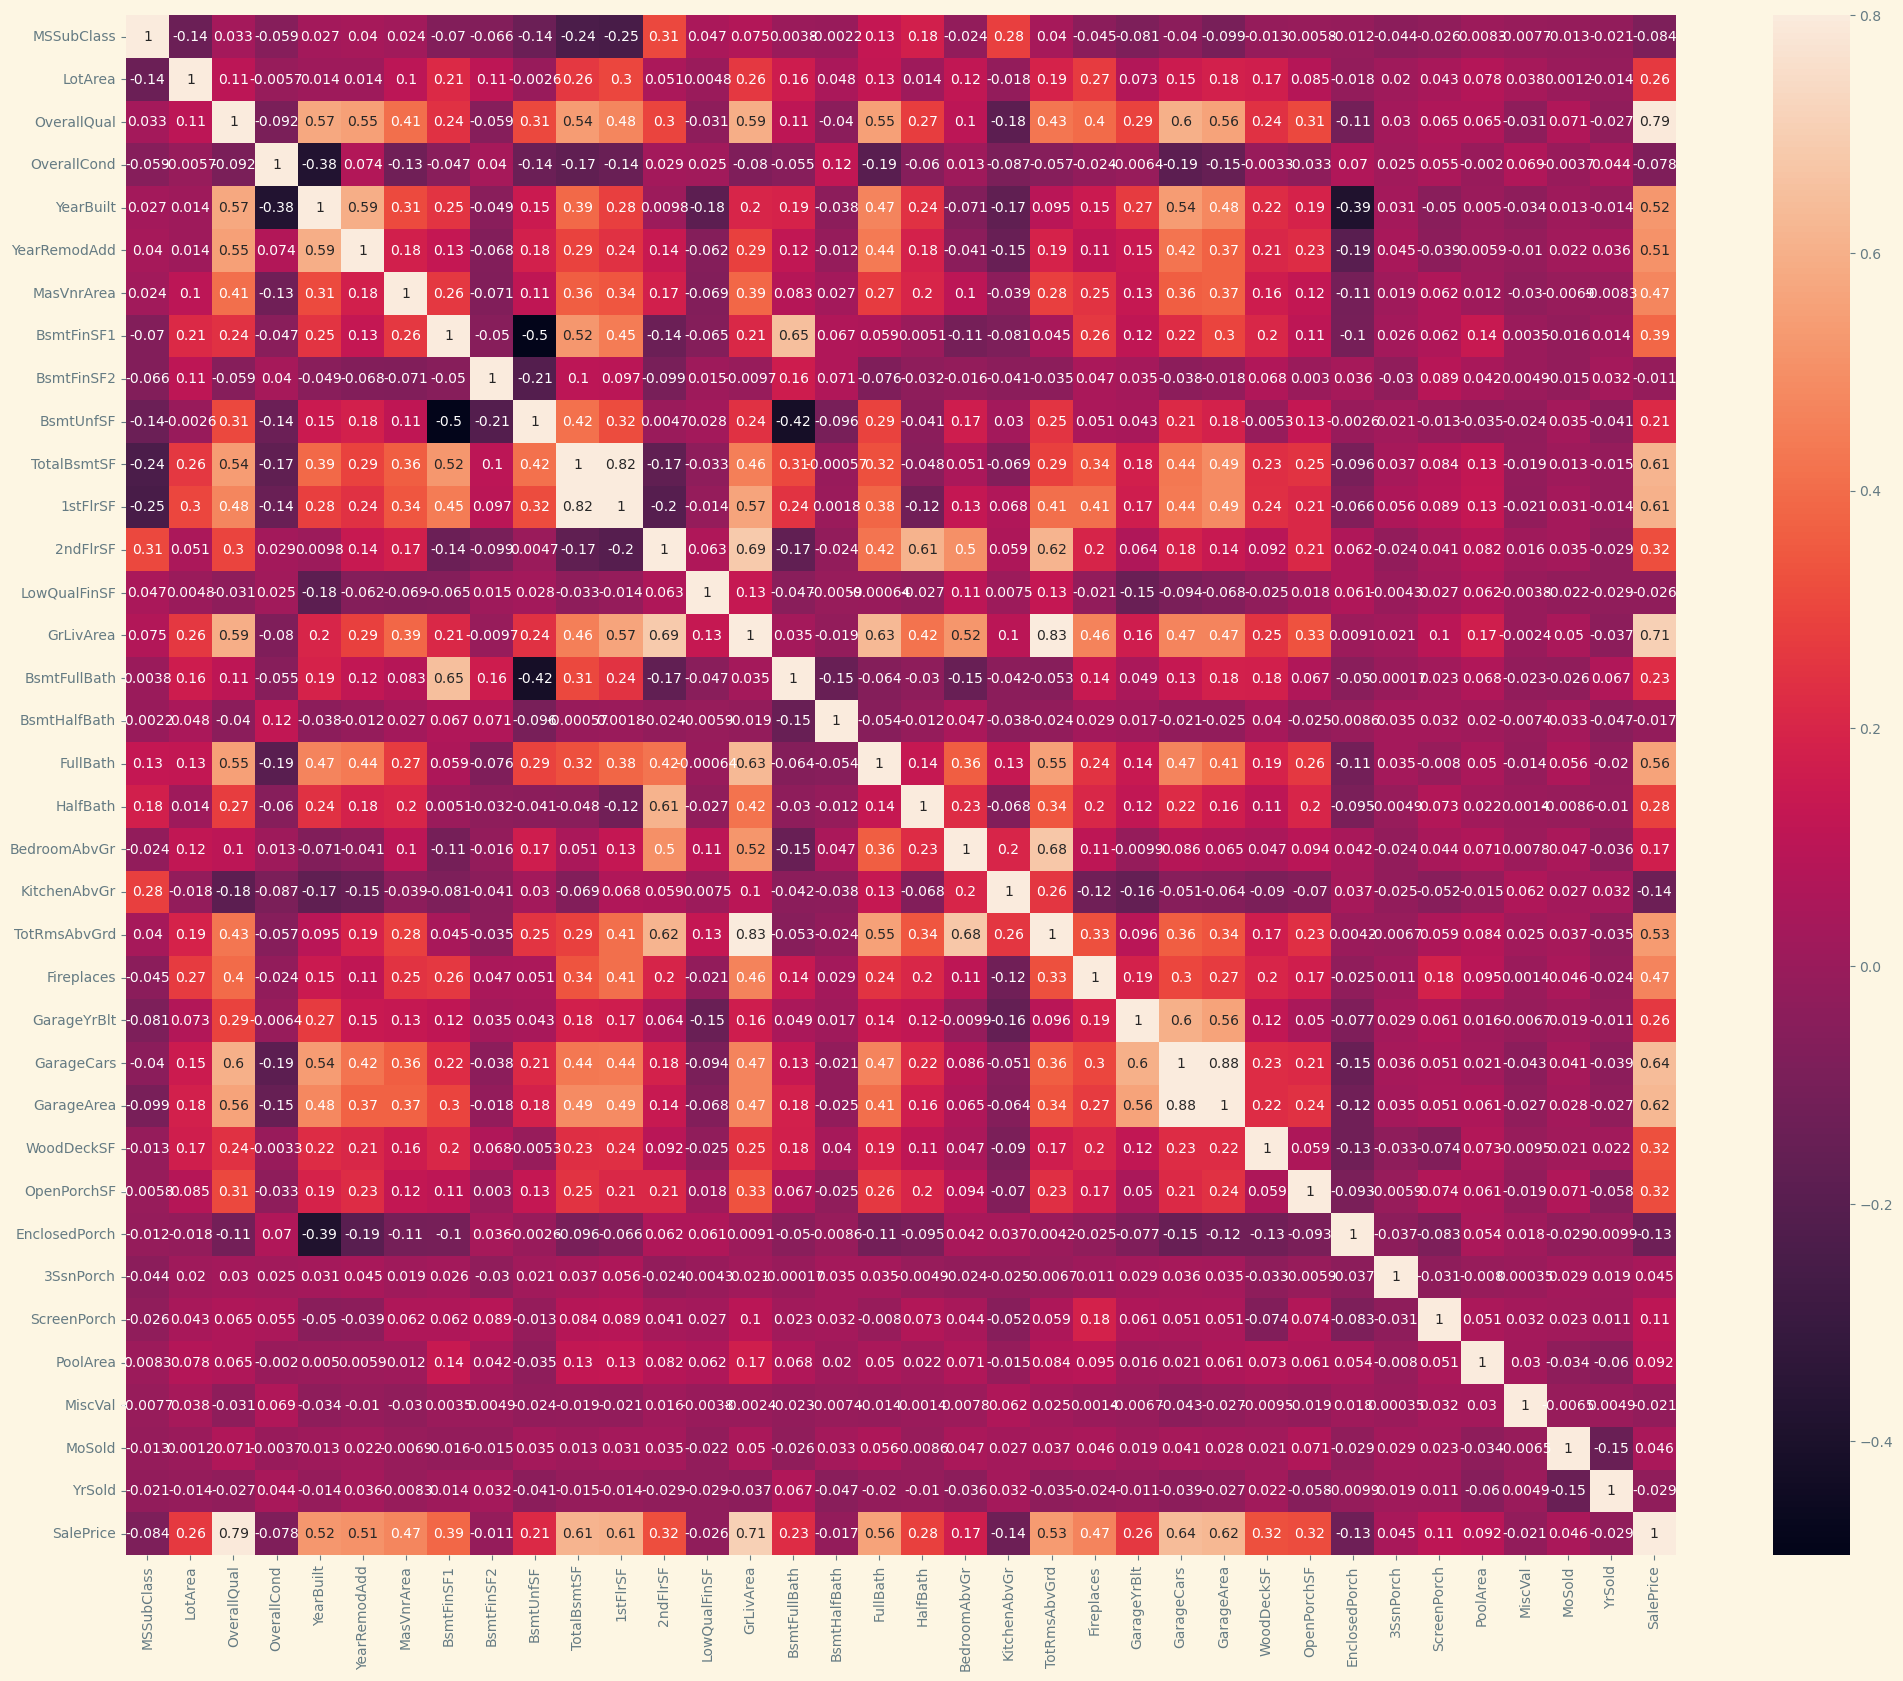

In [ ]:
#checking the correlation between variables
#creating correlation matrix
corrmat = housing.corr()
#creating figure
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(corrmat,vmax=0.8,annot=True)
plt.show()

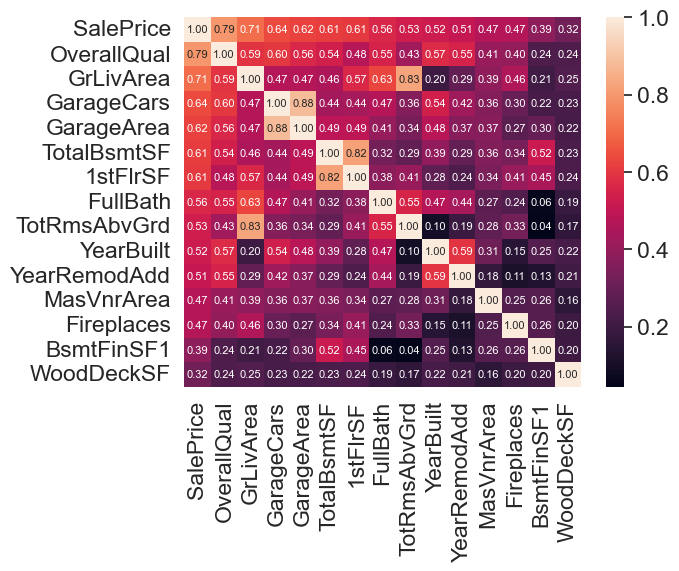

In [27]:
#creating heat-map with those are highly correlated with response variable
k=15 # number of variables for heatmap
#selecting feature names having high correlation with response variables
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#creating a transpose matrix of values 
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.5) #setting correlation matrix label size
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**<font style='color:blue'>From above we can observe that following features have high co-rrelation with SlaesPrice</font>**
- OverallQual, GrLivArea , GarageCars, GarageArea, TotalBSmtSF, 1stflrSF, FullBath, TotRmsAbvGrd,YearBuilt, YearRemodAdd, MasVnrArea, Fireplaces, BsmtFinSF1, WoodDeckSF

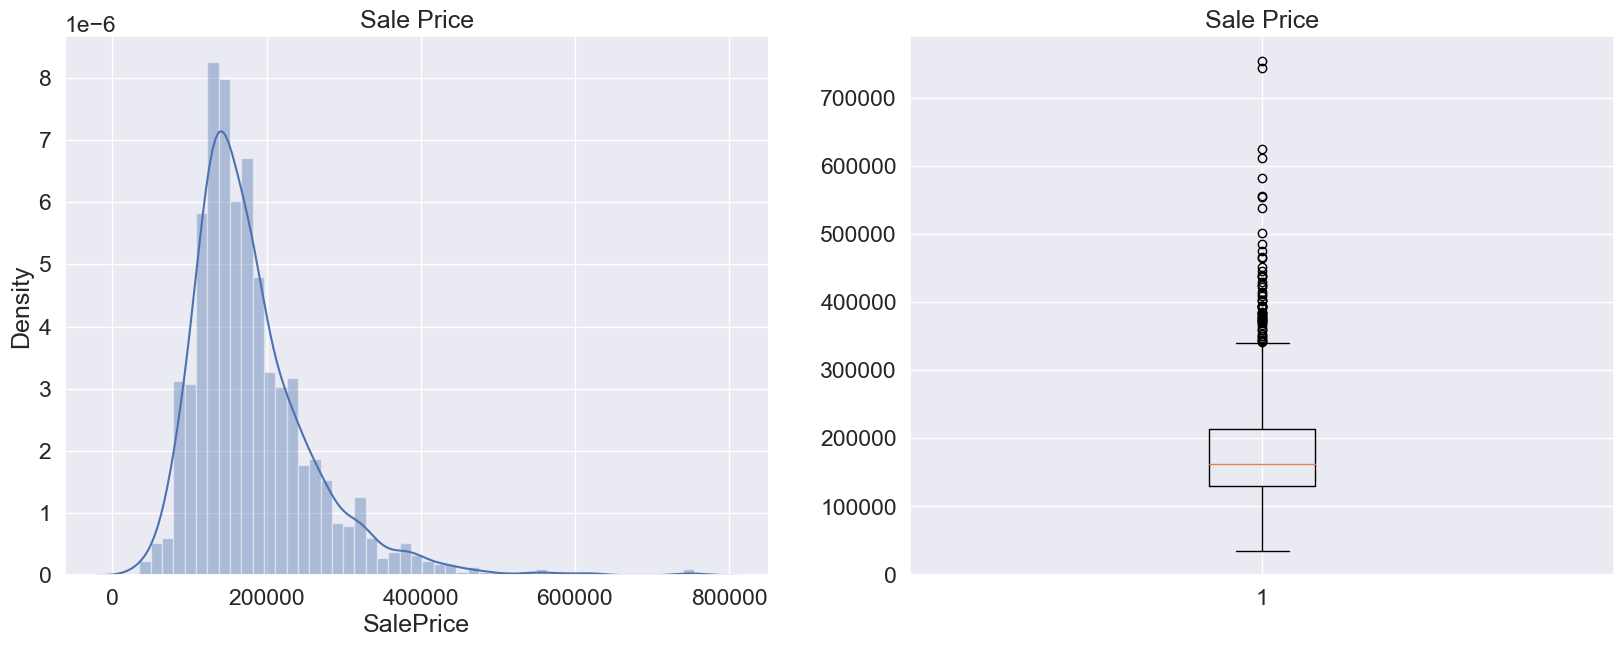

In [28]:
#visualizing response varibale distribution
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.distplot(housing['SalePrice'])
plt.title('Sale Price')
plt.subplot(1,2,2)
plt.boxplot('SalePrice', data=housing)
plt.title('Sale Price')
plt.show()

In [29]:
#checking skewnes and kurtosis values of response variable
print('Skewnes:',round(housing.SalePrice.skew(),2))
print('Kurtosis',round(housing.SalePrice.kurt(),2))

Skewnes: 1.88
Kurtosis 6.53


**<font style='color:Brown'>From above we can conclude that the response variable has high positive skewnes and a high kurtosis value which indicates that the response varibale has outliers, which need to be treated. This will be treated in data preparation stage</font>**

- Form boxplot we can observe that there is a disconnect in data after 600000

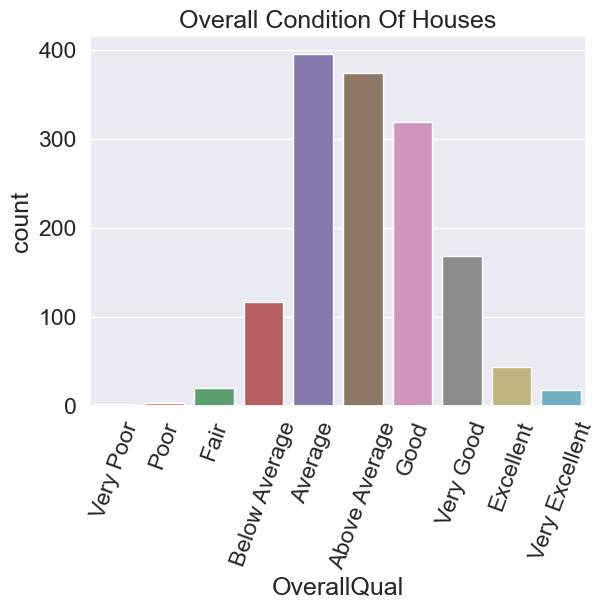

In [30]:
#analysing OverallQual feature
sns.countplot(x='OverallQual', data=housing)
plt.title('Overall Condition Of Houses')
plt.xticks([0,1,2,3,4,5,6,7,8,9],
           ['Very Poor', 'Poor', 'Fair', 'Below Average', 
            'Average','Above Average', 'Good','Very Good', 'Excellent',
            'Very Excellent'], rotation=70)
plt.show()

**<font style='color:blue'>From above we can observe that houses with average quality have higher demand, followed by above average and Good</font>**

In [31]:
#statistical summary for the high correlated features with response variable
housing[cols].describe()

SalePrice  OverallQual    GrLivArea   GarageCars   GarageArea  \
count    1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean   180930.394791     6.100069  1515.546950     1.766964   473.030158   
std     79468.964025     1.383171   525.650927     0.747546   213.869604   
min     34900.000000     1.000000   334.000000     0.000000     0.000000   
25%    129950.000000     5.000000  1129.000000     1.000000   333.000000   
50%    163000.000000     6.000000  1464.000000     2.000000   480.000000   
75%    214000.000000     7.000000  1777.500000     2.000000   576.000000   
max    755000.000000    10.000000  5642.000000     4.000000  1418.000000   

       TotalBsmtSF     1stFlrSF     FullBath  TotRmsAbvGrd    YearBuilt  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean   1057.891021  1162.906785     1.564770      6.517478  1971.244003   
std     438.500975   386.572089     0.550987      1.625902    30.199555   
min       0.000000   334.000000     0.000000      2.000000  1872.000000   
25%     796.000000   882.000000     1.000000      5.000000  1954.000000   
50%     992.000000  1088.000000     2.000000      6.000000  1973.000000   
75%    1298.500000  1391.500000     2.000000      7.000000  2000.000000   
max    6110.000000  4692.000000     3.000000     14.000000  2010.000000   

       YearRemodAdd   MasVnrArea   Fireplaces   BsmtFinSF1   WoodDeckSF  
count   1459.000000  1459.000000  1459.000000  1459.000000  1459.000000  
mean    1984.850583   103.187800     0.613434   443.943797    94.240576  
std       20.644343   180.773158     0.644687   456.106417   125.381679  
min     1950.000000     0.000000     0.000000     0.000000     0.000000  
25%     1967.000000     0.000000     0.000000     0.000000     0.000000  
50%     1994.000000     0.000000     1.000000   384.000000     0.000000  
75%     2004.000000   164.500000     1.000000   712.500000   168.000000  
max     2010.000000  1600.000000     3.000000  5644.000000   857.000000

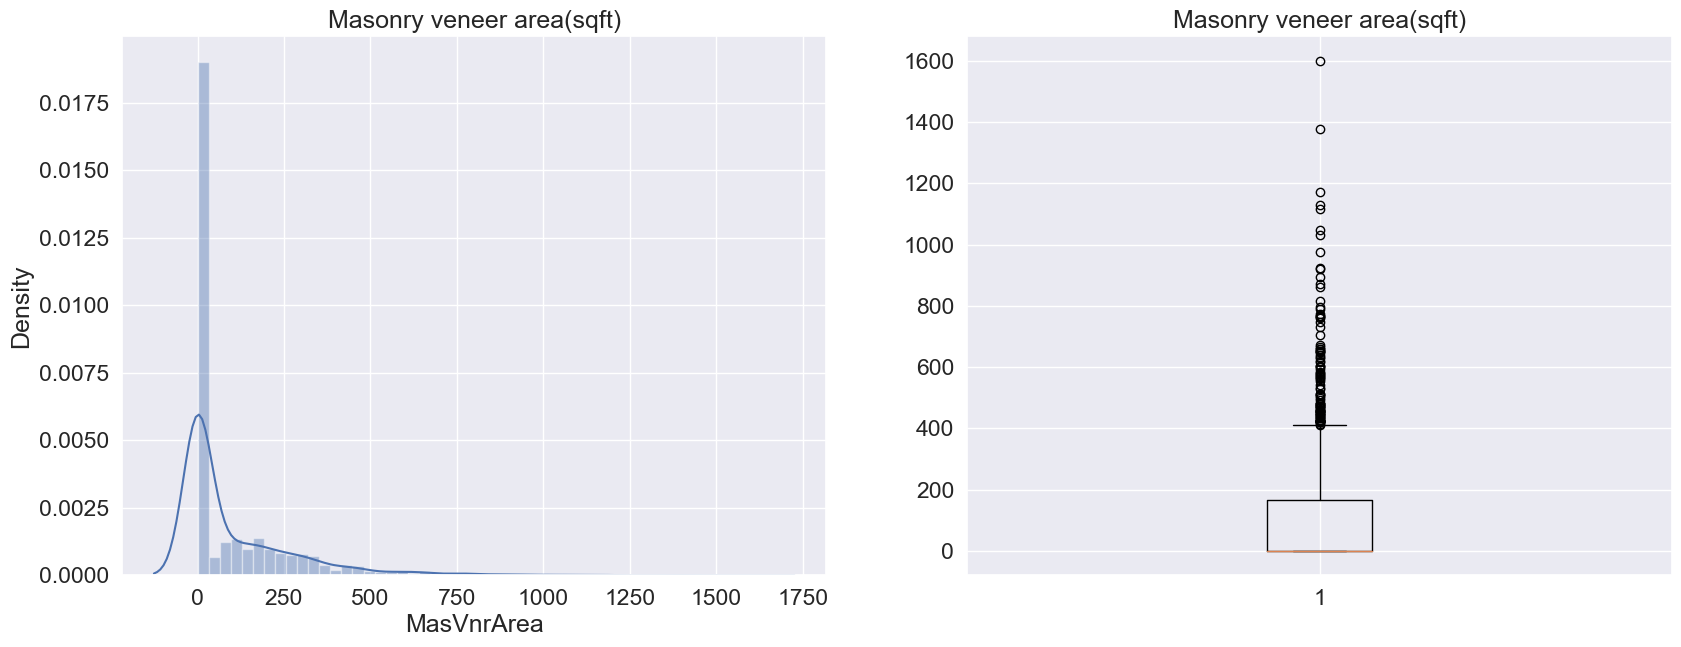

In [32]:
#checking data distribution for MasVnrArea 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.distplot(housing['MasVnrArea'])
plt.title('Masonry veneer area(sqft)')
plt.subplot(1,2,2)
plt.boxplot('MasVnrArea', data=housing)
plt.title('Masonry veneer area(sqft)')
plt.show()

- From the distribution plot we can see that the feature has a positive skewness and from the box plot teh same can be confirmed the same,  there is a disconnect in data after 1000, this can be considered for outlier treatment.

In [33]:
housing[cat_col].describe()

MSZoning Street            Alley LotShape LandContour Utilities  \
count      1459   1459             1459     1459        1459      1459   
unique        5      2                3        4           4         2   
top          RL   Pave  No_Alley_access      Reg         Lvl    AllPub   
freq       1150   1453             1368      924        1310      1458   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1459      1459         1459       1459       1459     1459   
unique         5         3           25          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1051      1381          225       1259       1444     1219   

       HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
count        1459      1459     1459        1459        1459       1459   
unique          8         6        8          15          16          5   
top        1Story     Gable  CompShg     VinylSd     VinylSd       None   
freq          726      1140     1433         514         503        863   

       ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
count       1459      1459       1459     1459     1459         1459   
unique         4         5          6        5        5            5   
top           TA        TA      PConc       TA       TA           No   
freq         905      1281        646      649     1310          952   

       BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
count          1459         1459    1459      1459       1459       1459   
unique            7            7       6         5          2          5   
top             Unf          Unf    GasA        Ex          Y      SBrkr   
freq            429         1255    1427       741       1364       1334   

       KitchenQual Functional   FireplaceQu GarageType GarageFinish  \
count         1459       1459          1459       1459         1459   
unique           4          7             6          7            4   
top             TA        Typ  No_Fireplace     Attchd          Unf   
freq           735       1359           689        870          605   

       GarageQual GarageCond PavedDrive   PoolQC     Fence MiscFeature  \
count        1459       1459       1459     1459      1459        1459   
unique          6          6          3        4         5           5   
top            TA         TA          Y  No_Pool  No_Fence        None   
freq         1310       1325       1339     1452      1178        1405   

       SaleType SaleCondition  
count      1459          1459  
unique        9             6  
top          WD        Normal  
freq       1266          1197

- Analysing categorical columns for insight

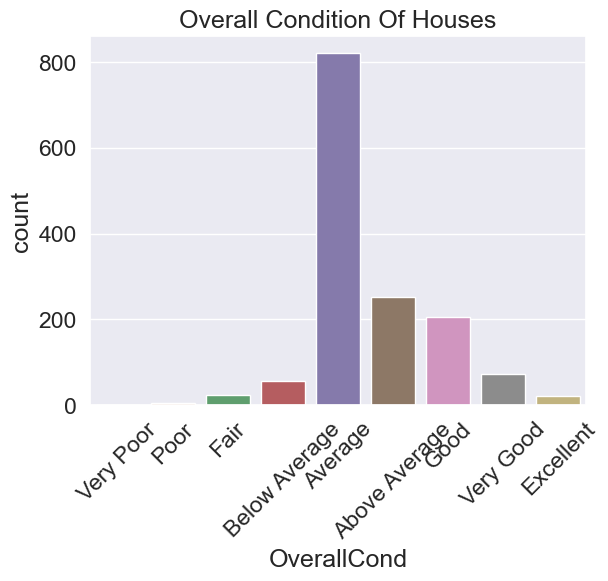

In [34]:
#ploting distribution for OverallCond feature
sns.countplot(x='OverallCond', data=housing)
plt.title('Overall Condition Of Houses')
plt.xticks([0,1,2,3,4,5,6,7,8],
           ['Very Poor', 'Poor', 'Fair', 'Below Average', 
            'Average','Above Average', 'Good','Very Good', 'Excellent'], rotation=45)
plt.show()

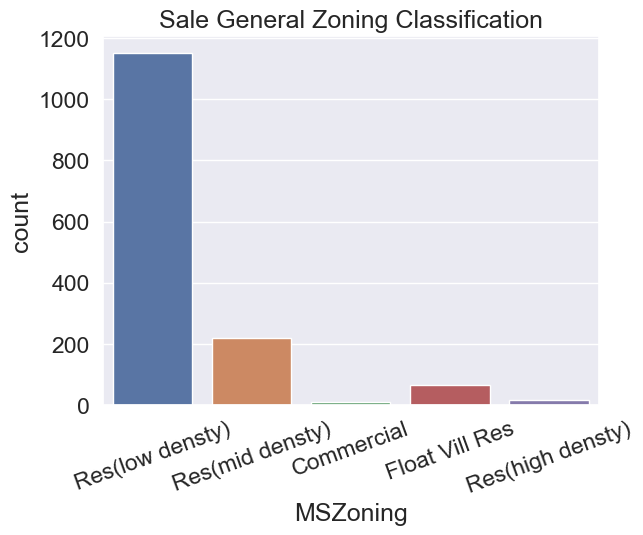

In [35]:
sns.countplot(x='MSZoning',data=housing)
zones = ['Res(low densty)','Res(mid densty)' ,'Commercial', 'Float Vill Res', 'Res(high densty)']
nos = [0,1,2,3,4]
plt.xticks(nos, zones, rotation=20)
plt.title('Sale General Zoning Classification')
plt.show()

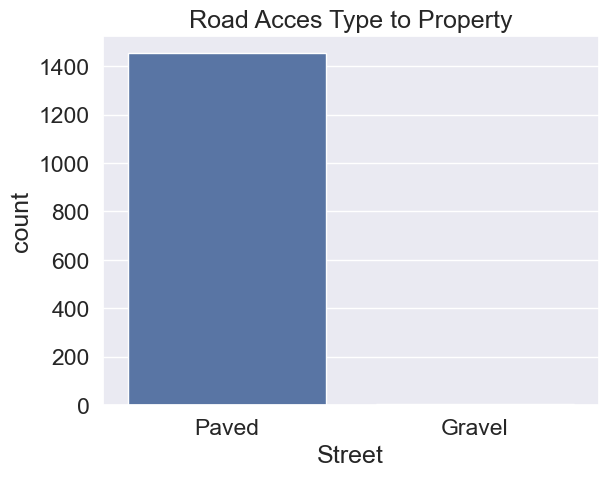

In [36]:
sns.countplot(x='Street', data=housing)
plt.title('Road Acces Type to Property')
plt.xticks([0,1],['Paved','Gravel'])
plt.show()

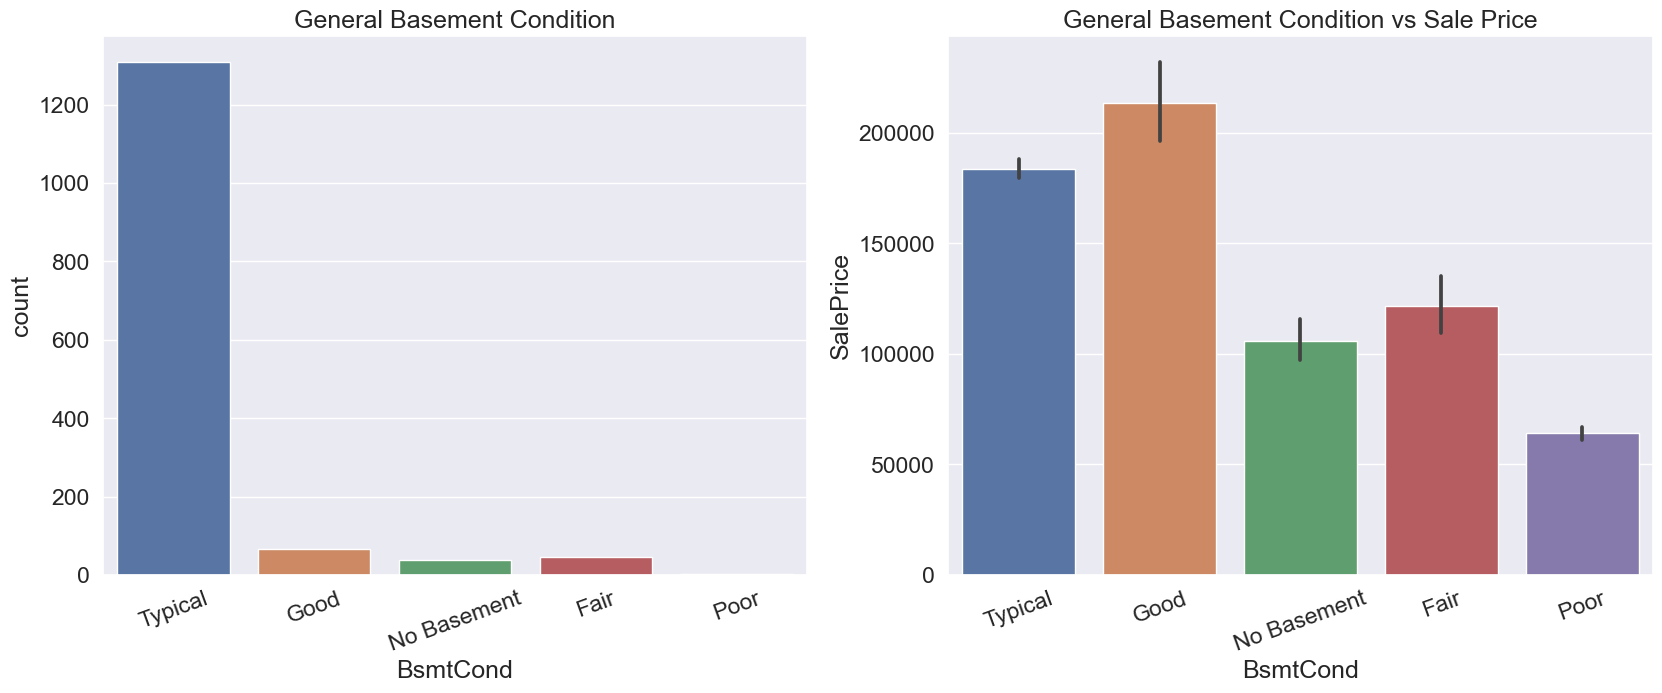

In [37]:
plt.figure(figsize=(20,7))
labels = ['Typical','Good', 'No Basement', 'Fair', 'Poor']
nos = [0,1,2,3,4]

plt.subplot(1,2,1)
sns.countplot(x='BsmtCond', data=housing)
plt.title('General Basement Condition')
plt.xticks(nos, labels, rotation=20)

plt.subplot(1,2,2)
sns.barplot(x='BsmtCond',y= 'SalePrice',data=housing)
plt.title('General Basement Condition vs Sale Price')
plt.xticks(nos, labels, rotation=20)
plt.show()

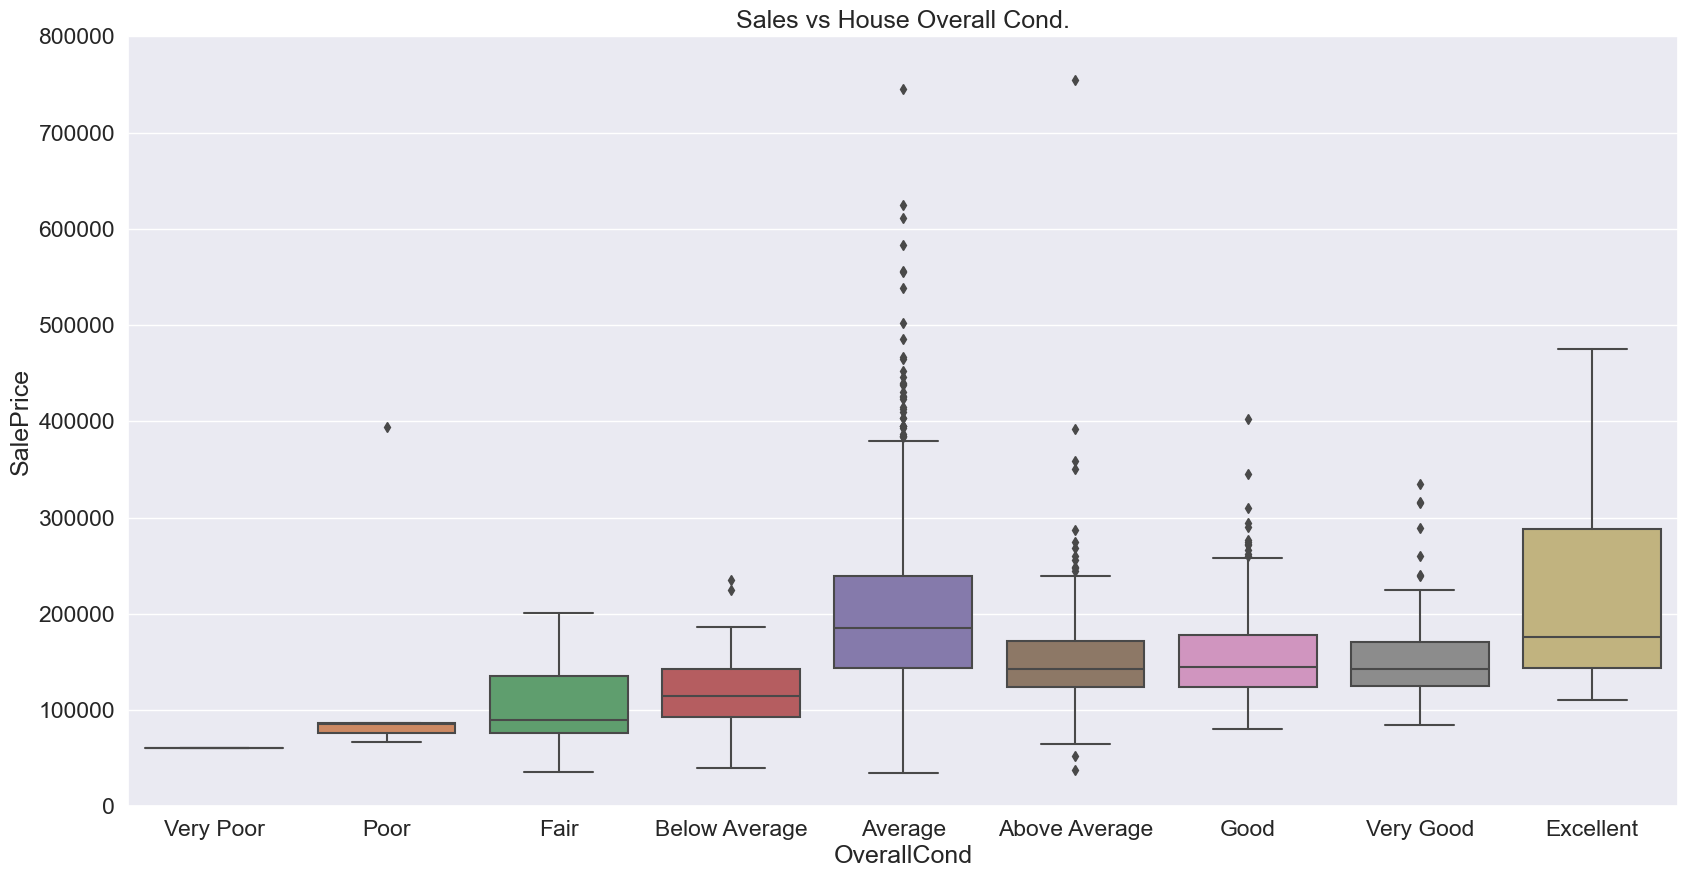

In [38]:
#SalePrice vs Over condition
plt.figure(figsize=(20,10))
sns.boxplot(x='OverallCond',y='SalePrice', data=housing)
plt.title('Sales vs House Overall Cond.')
label_vals = ['Very Poor', 'Poor', 'Fair', 'Below Average', 
            'Average','Above Average', 'Good','Very Good', 'Excellent']
plt.xticks([0,1,2,3,4,5,6,7,8],label_vals, rotation=0)
plt.ylim(0,800000)
plt.show()

In [39]:
print(num_col)
print(cat_col)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'

In [40]:
housing[['GarageArea','GarageCars','SalePrice' ]].corr()

GarageArea  GarageCars  SalePrice
GarageArea    1.000000    0.882613   0.623423
GarageCars    0.882613    1.000000   0.640473
SalePrice     0.623423    0.640473   1.000000

In [41]:
pair_df = housing[cols]

<Figure size 2500x1500 with 0 Axes>

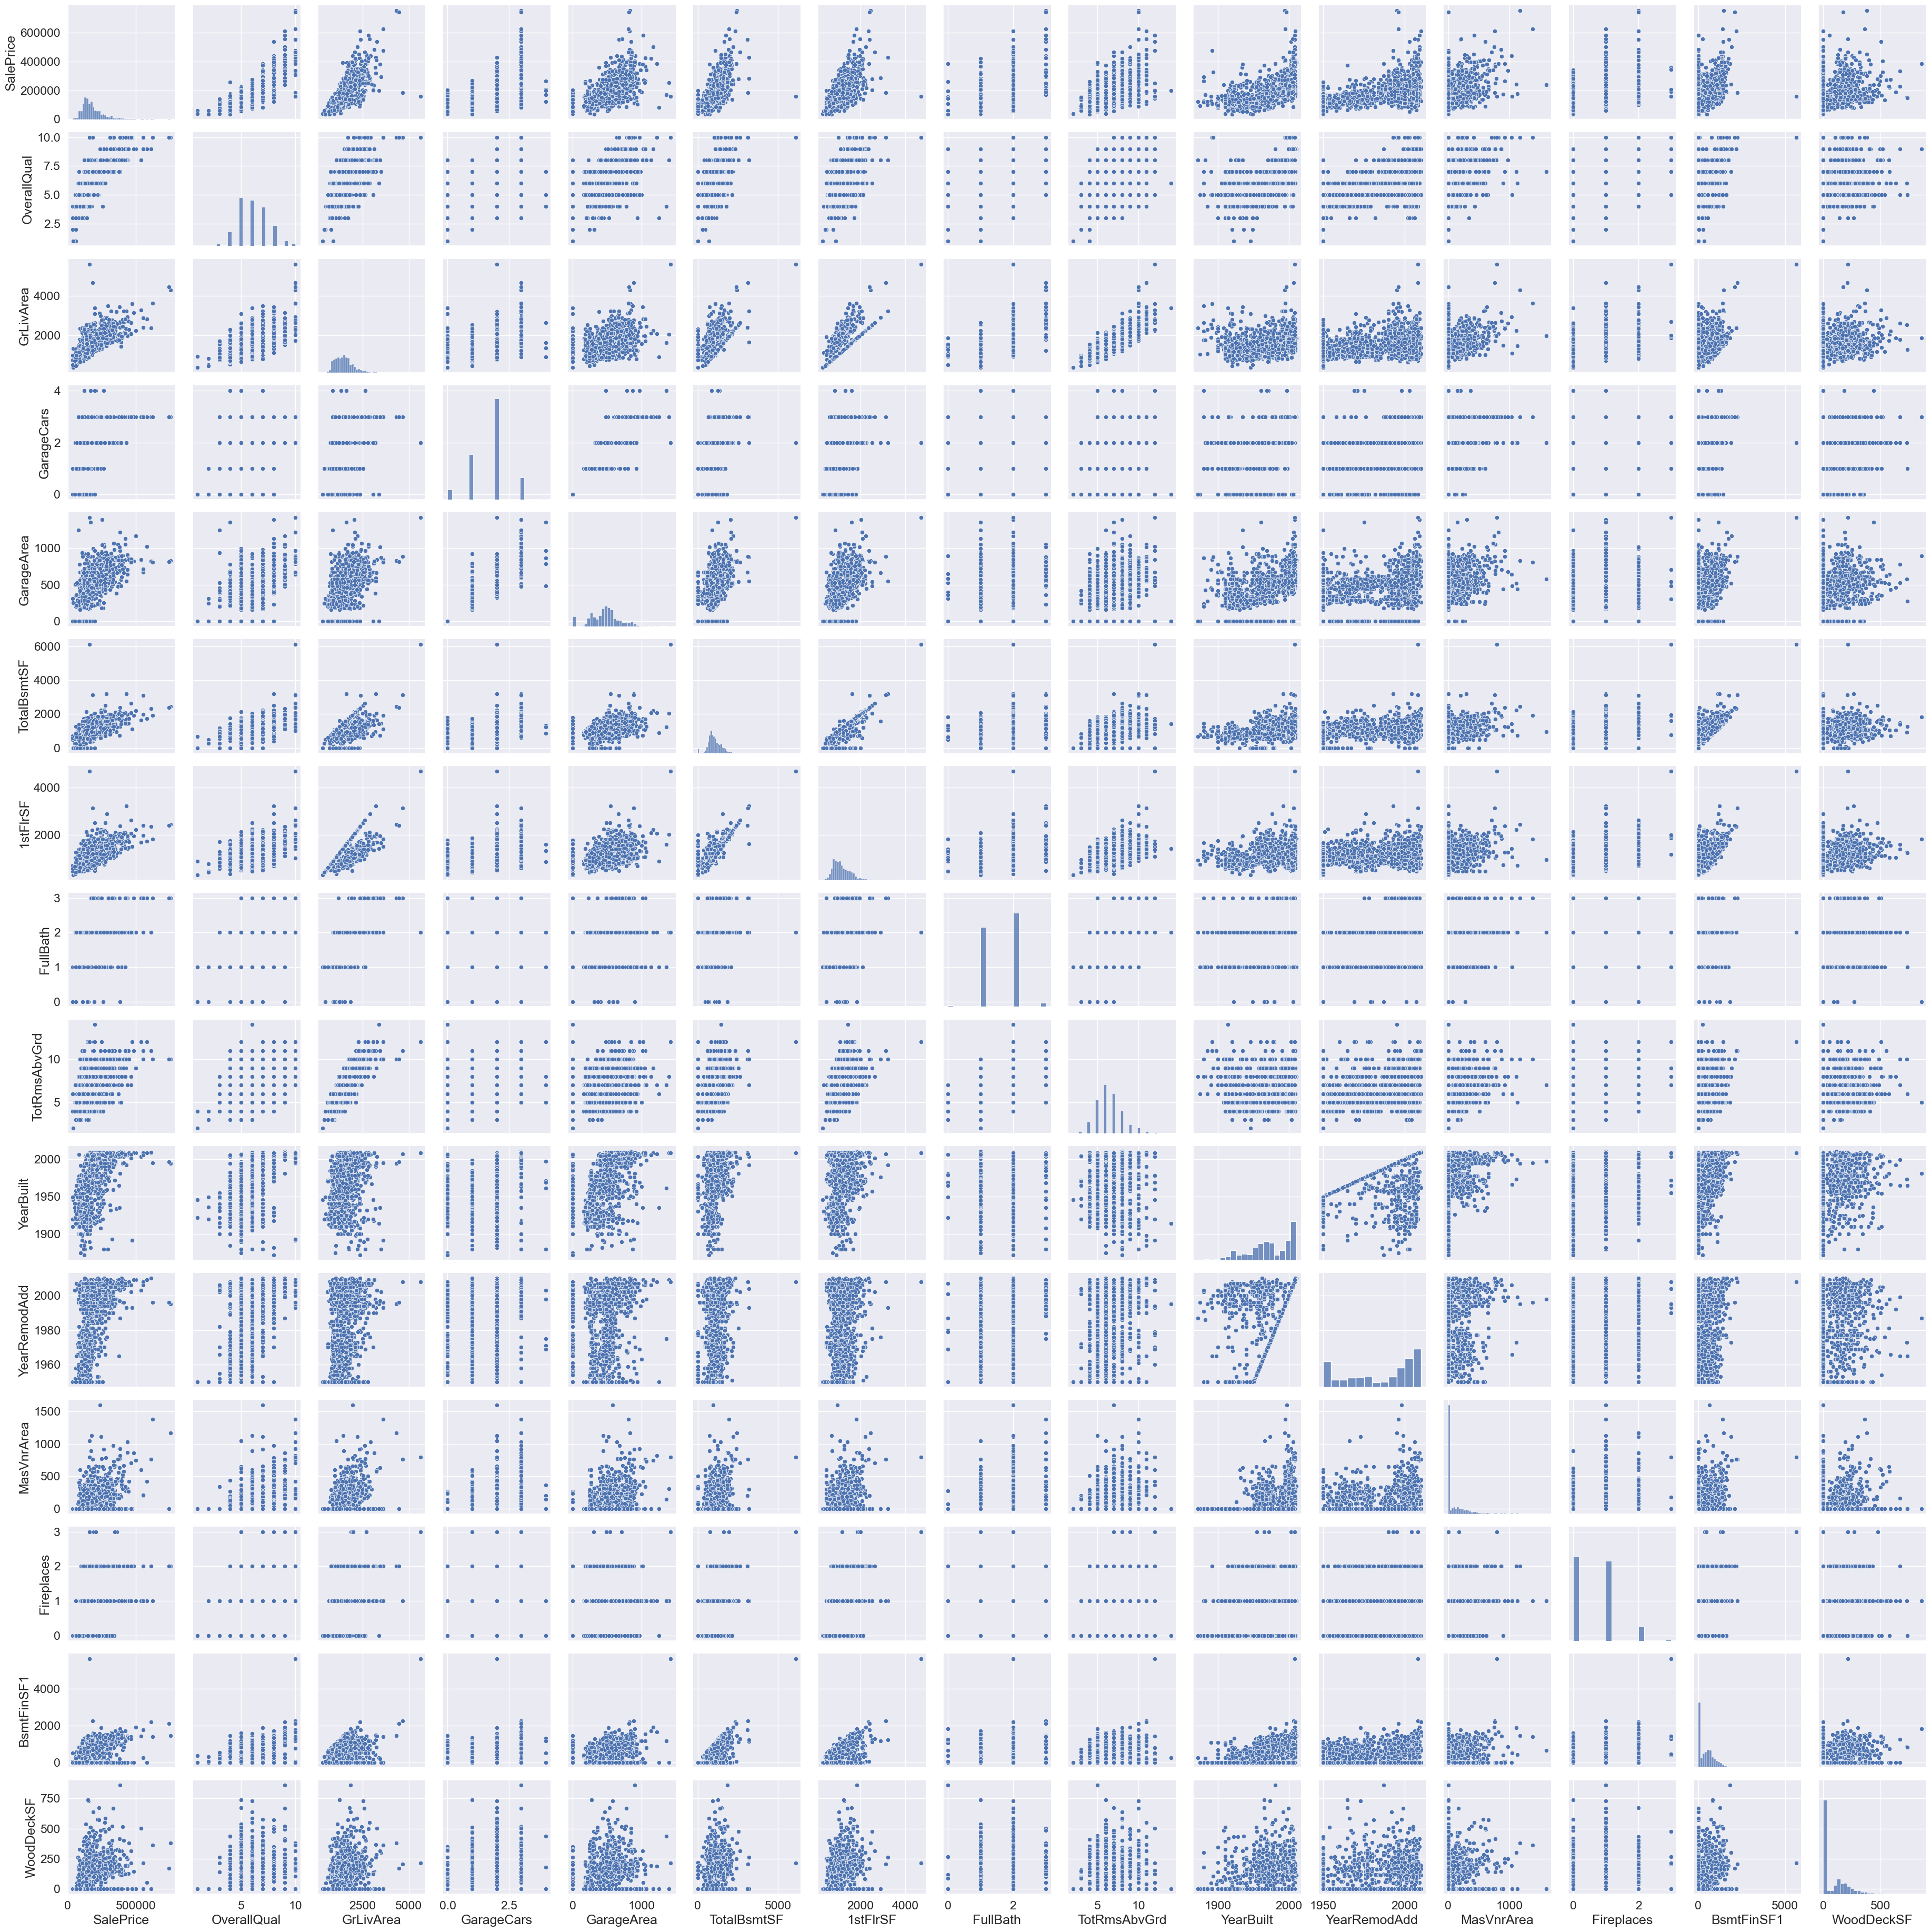

In [ ]:
plt.figure(figsize=(25,15))
sns.pairplot(pair_df)
plt.show()

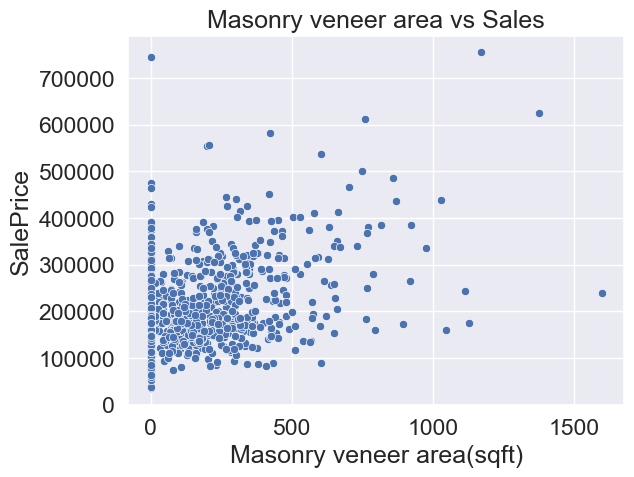

In [43]:
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=housing)
plt.xlabel('Masonry veneer area(sqft)')
plt.title('Masonry veneer area vs Sales')
plt.show()

### Data Preparation

- Target variable sales has positive sqewness it needs to be treated applying log transformation

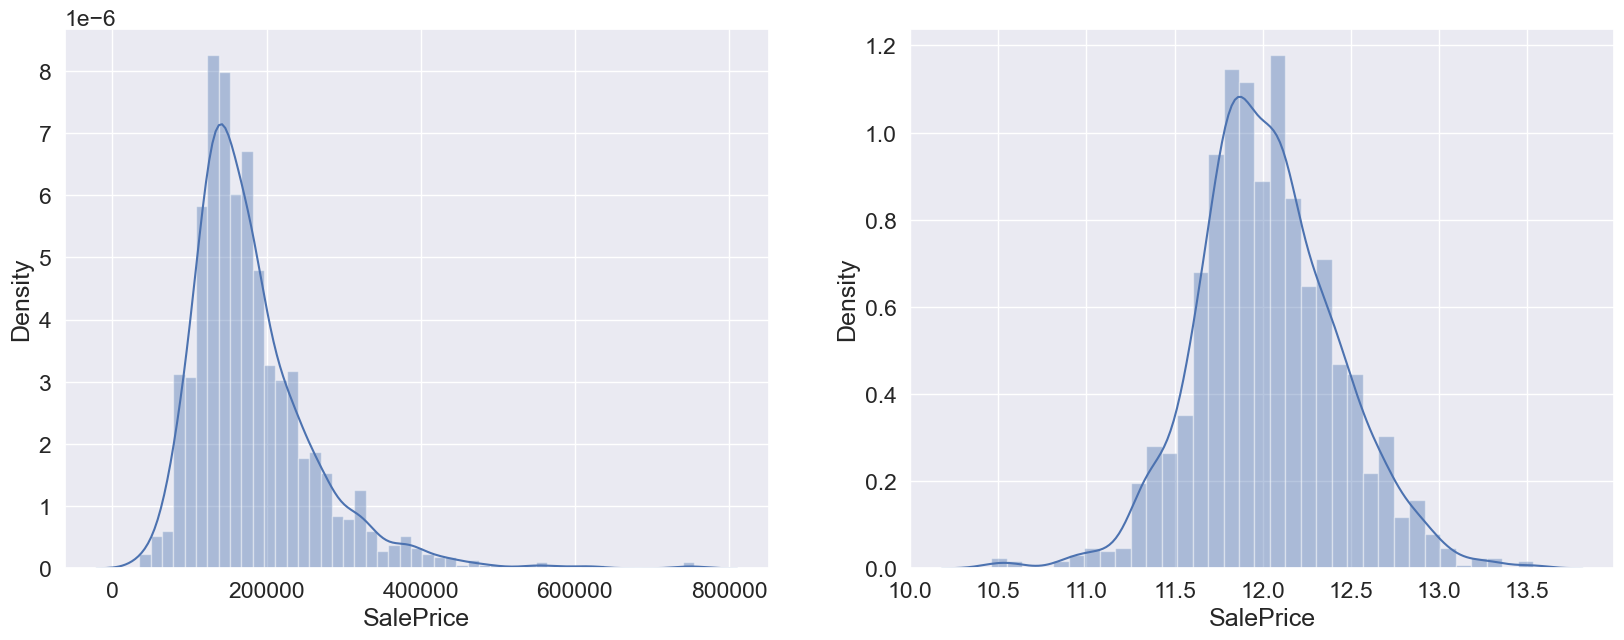

In [44]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.distplot(housing['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(np.log(housing['SalePrice']))
plt.show()

In [45]:
housing['transformedSalePrice']  = np.log(housing['SalePrice'])

#removing outliers form MasVnrArea
housing = housing[housing['MasVnrArea']<1000]

In [46]:
#converting all binary variables to 0 and 1
binary_vars = []
cat_vars = []
for i in housing.columns:
    if housing[i].nunique() == 2:
        binary_vars.append(i)

In [47]:
housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0)
housing['Utilities'] = housing['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)
housing['CentralAir'] = housing['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

In [48]:
housing[['Street','Utilities', 'CentralAir']].head()

Street  Utilities  CentralAir
0       1          1           1
1       1          1           1
2       1          1           1
3       1          1           1
4       1          1           1

In [49]:
#identifying all the varibales with more than two category
cat_vars = housing.select_dtypes(include='object')
cat_vars.shape

(1459, 40)

In [50]:
#converting to dummy variables
cat_vars = pd.get_dummies(cat_vars, drop_first=True)
cat_vars.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No_Alley_access  \
0            0            0            1            0                      1   
1            0            0            1            0                      1   
2            0            0            1            0                      1   
3            0            0            1            0                      1   
4            0            0            1            0                      1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             1                0   
2           0             0             0             0                0   
3           0             0             0             0                0   
4           0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0                0                1                  0              0   
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                    

In [51]:
#creating a diffrent datframe object for further operation
df_house = housing.copy()

In [52]:
df_house.head()

MSSubClass MSZoning  LotArea  Street            Alley LotShape LandContour  \
0          60       RL     8450       1  No_Alley_access      Reg         Lvl   
1          20       RL     9600       1  No_Alley_access      Reg         Lvl   
2          60       RL    11250       1  No_Alley_access      IR1         Lvl   
3          70       RL     9550       1  No_Alley_access      IR1         Lvl   
4          60       RL    14260       1  No_Alley_access      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0          1    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          1       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2          1    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3          1    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          1       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1      SBrkr       856       854             0       1710   
1           1      SBrkr      1262         0             0       1262   
2           1      SBrkr       920       866             0       1786   
3           1      SBrkr       961       756             0       1717   
4           1      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No_Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1      

In [53]:
#selecting all columns with categorical observations
temp = df_house.select_dtypes(include='object').columns

In [54]:
temp

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
#removing categorical variables from the dataframe
df_house.drop(labels=temp, axis=1,inplace=True)

In [56]:
multilvl_feature = []
for i in df_house.columns:
    if (df_house[i].nunique() >2):
        multilvl_feature.append(i)
len(multilvl_feature)

37

In [57]:
df_house[multilvl_feature].head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  transformedSalePrice  
0     208500             12.247694  
1     181500             12.109011  
2     223500             12.317167  
3     140000             11.849398  
4     250000             12.429216

In [58]:
#adding all the dummy features to dataframe
df_house = pd.concat([df_house, cat_vars], axis=1)

In [59]:
df_house.shape

(1459, 261)

In [60]:
df_house.head()

MSSubClass  LotArea  Street  Utilities  OverallQual  OverallCond  \
0          60     8450       1          1            7            5   
1          20     9600       1          1            6            8   
2          60    11250       1          1            7            5   
3          70     9550       1          1            7            5   
4          60    14260       1          1            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       2003          2003       196.0         706           0        150   
1       1976          1976         0.0         978           0        284   
2       2001          2002       162.0         486           0        434   
3       1915          1970         0.0         216           0        540   
4       2000          2000       350.0         655           0        490   

   TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856           1       856       854             0       1710   
1         1262           1      1262         0             0       1262   
2          920           1       920       866             0       1786   
3          756           1       961       756             0       1717   
4         1145           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  transformedSalePrice  MSZoning_FV  MSZoning_RH  \
0       2    2008     208500             12.247694            0            0   
1       5    2007     181500             12.109011            0            0   
2       9    2008     223500             12.317167            0            0   
3       2    2006     140000             11.849398            0            0   
4      12    2008     250000             12.429216            0            0   

   MSZoning_RL  MSZoning_RM  Alley_No_Alley_access  Alley_Pave  LotShape_IR2  \
0            1            0                      1           0             0   
1            1            0                      1           0             0   
2            1            0                      1           0             0   
3            1            0                      1           0             0   
4            1            0                      1           0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3      

In [61]:
#Removing non transformed SalePrice from dataframe
df_house.drop(labels='SalePrice', axis=1,inplace=True)

### Train and Test split

In [62]:
df_train, df_test = train_test_split(df_house, train_size=.70, random_state=42)

In [63]:
print(df_train.shape)
print(df_test.shape)

(1021, 260)
(438, 260)


In [64]:
multilvl_feature.remove('SalePrice')

In [65]:
df_train[multilvl_feature].head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
135           20    10400            7            6       1970          1970   
1452         180     3675            5            5       2005          2005   
1046          60    16056            9            5       2005          2006   
691           60    21535           10            6       1994          1995   
435           60    10667            7            6       1996          1996   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
135        288.0           0           0       1304         1304      1682   
1452        80.0         547           0          0          547      1072   
1046       208.0         240           0       1752         1992      1992   
691       1170.0        1455           0        989         2444      2444   
435          0.0         385         344         70          799       827   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
135          0             0       1682             0             0         2   
1452         0             0       1072             1             0         1   
1046       876             0       2868             0             0         3   
691       1872             0       4316             0             1         3   
435        834             0       1661             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
135          0             3             1             7           1   
1452         0             2             1             5           0   
1046         1             4             1            11           1   
691          1             4             1            10           2   
435          1             3             1             6           1   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
135        1970.0           2         530          98            0   
1452       2005.0           2         525           0           28   
1046       2005.0           3         716         214          108   
691        1994.0           3         832         382           50   
435        1996.0           2         550         158           61   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
135               0          0            0         0        0       5   
1452              0          0            0         0        0       5   
1046              0          0            0         0        0       7   
691               0          0            0         0        0       1   
435               0          0            0         0        0       4   

      YrSold  transformedSalePrice  
135     2008             12.066811  
1452    2006             11.884489  
1046    2006             13.229568  
691     2007             13.534473  
435     2009             12.264342

In [66]:
#scalling the numercal features
scaler = MinMaxScaler()
df_train[multilvl_feature] = scaler.fit_transform(df_train[multilvl_feature])
df_test[multilvl_feature] = scaler.transform(df_test[multilvl_feature])

In [67]:
#creating train and test data subsets
y_train = df_train.pop('transformedSalePrice')
X_train = df_train
y_test = df_test.pop('transformedSalePrice')
X_test = df_test

#chekcing teh dimension of created subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1021, 259)
(1021,)
(438, 259)
(438,)


In [68]:
df_train.describe()

MSSubClass      LotArea       Street    Utilities  OverallQual  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.222158     0.043551     0.996082     0.999021     0.569268   
std       0.252288     0.050844     0.062500     0.031296     0.151505   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.028979     1.000000     1.000000     0.444444   
50%       0.176471     0.038659     1.000000     1.000000     0.555556   
75%       0.294118     0.048354     1.000000     1.000000     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1021.000000  1021.000000   1021.000000  1021.000000  1021.000000   
mean      0.567826     0.705010      0.579497     0.074192     0.079576   
std       0.137232     0.233647      0.346659     0.126602     0.082364   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.500000     0.569231      0.266667     0.000000     0.000000   
50%       0.500000     0.715385      0.733333     0.000000     0.068391   
75%       0.625000     0.930769      0.900000     0.116836     0.129872   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF   CentralAir     1stFlrSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.038637     0.245101     0.174341     0.934378     0.191477   
std       0.137753     0.190629     0.073250     0.247741     0.088952   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.095462     0.131588     1.000000     0.127352   
50%       0.000000     0.206764     0.163830     1.000000     0.174621   
75%       0.000000     0.347175     0.212111     1.000000     0.242772   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000   
mean      0.185079      0.009474     0.223501      0.142671      0.025955   
std       0.232790      0.083161     0.098123      0.172120      0.113164   
min       0.000000      0.000000     0.000000      0.000000      0.000000   
25%       0.000000      0.000000     0.151846      0.000000      0.000000   
50%       0.000000      0.000000     0.214393      0.000000      0.000000   
75%       0.388889      0.000000     0.271665      0.333333      0.000000   
max       1.000000      1.000000     1.000000      1.000000      1.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000   
mean      0.524976     0.191969      0.360309      0.525955      0.378142   
std       0.180026     0.250243      0.102653      0.113164      0.134315   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.333333     0.000000      0.250000      0.500000      0.250000   
50%       0.666667     0.000000      0.375000      0.500000      0.333333   
75%       0.666667     0.500000      0.375000      0.500000      0.416667   
max       1.000000     1.000000      1.000000      1.000000      1.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.204048     0.934187     0.446376     0.335147     0.108375   
std       0.215522     0.216851     0.184581     0.147709     0.147528   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.974129     0.250000     0.238364     0.000000   
50%       0.333333     0.984080     0.500000     0.338505     0.000000   
75%       0.333333     0.996020     0.500000     0.406206     0.196033   
max       1.000000

## Model Building

In [69]:
#creatiog linear regression model
lr = LinearRegression()
#training the model
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
#Calculating rfe for the features with 20
rfe = RFE(lr,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe_features = list(zip(X_train,rfe.support_, rfe.ranking_))
rfe_features

[('MSSubClass', False, 216),
 ('LotArea', False, 28),
 ('Street', False, 203),
 ('Utilities', False, 151),
 ('OverallQual', False, 25),
 ('OverallCond', False, 30),
 ('YearBuilt', False, 29),
 ('YearRemodAdd', False, 100),
 ('MasVnrArea', False, 193),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 89),
 ('1stFlrSF', False, 12),
 ('2ndFlrSF', False, 13),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', False, 14),
 ('BsmtFullBath', False, 74),
 ('BsmtHalfBath', False, 235),
 ('FullBath', False, 121),
 ('HalfBath', False, 140),
 ('BedroomAbvGr', False, 210),
 ('KitchenAbvGr', False, 32),
 ('TotRmsAbvGrd', False, 75),
 ('Fireplaces', False, 56),
 ('GarageYrBlt', False, 109),
 ('GarageCars', False, 195),
 ('GarageArea', False, 36),
 ('WoodDeckSF', False, 70),
 ('OpenPorchSF', False, 224),
 ('EnclosedPorch', False, 53),
 ('3SsnPorch', False, 64),
 ('ScreenPorch', False, 59),
 ('PoolArea', True, 1),
 ('MiscVal', Fals

In [125]:
#craeting dataframe for the refe features 
rfe_features_df = pd.DataFrame(list(zip(X_train,rfe.support_, rfe.ranking_)), columns=['Feature', 'Selection_status', 'rank'])

In [129]:
#sorting the features baes on selection rank
rfe_features_df.sort_values(by='rank', ascending=True, ignore_index=True).head(10)

Feature  Selection_status  rank
0      GarageQual_No_Garage              True     1
1          MiscFeature_Othr              True     1
2  BsmtFinType2_No_Basement              True     1
3          RoofMatl_Membran              True     1
4  BsmtFinType1_No_Basement              True     1
5      GarageType_No_Garage              True     1
6    GarageFinish_No_Garage              True     1
7            RoofStyle_Shed              True     1
8                  PoolArea              True     1
9               TotalBsmtSF              True     1

In [72]:
cols = X_train.columns[rfe.support_]
cols

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'PoolArea',
       'Condition2_RRAe', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_WdShngl', 'BsmtQual_No_Basement', 'BsmtCond_No_Basement',
       'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement',
       'GarageType_No_Garage', 'GarageFinish_No_Garage',
       'GarageQual_No_Garage', 'GarageCond_No_Garage', 'PoolQC_Gd',
       'PoolQC_No_Pool', 'MiscFeature_Othr'],
      dtype='object')

In [73]:
X_train.describe()

MSSubClass      LotArea       Street    Utilities  OverallQual  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.222158     0.043551     0.996082     0.999021     0.569268   
std       0.252288     0.050844     0.062500     0.031296     0.151505   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.028979     1.000000     1.000000     0.444444   
50%       0.176471     0.038659     1.000000     1.000000     0.555556   
75%       0.294118     0.048354     1.000000     1.000000     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1021.000000  1021.000000   1021.000000  1021.000000  1021.000000   
mean      0.567826     0.705010      0.579497     0.074192     0.079576   
std       0.137232     0.233647      0.346659     0.126602     0.082364   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.500000     0.569231      0.266667     0.000000     0.000000   
50%       0.500000     0.715385      0.733333     0.000000     0.068391   
75%       0.625000     0.930769      0.900000     0.116836     0.129872   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF   CentralAir     1stFlrSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.038637     0.245101     0.174341     0.934378     0.191477   
std       0.137753     0.190629     0.073250     0.247741     0.088952   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.095462     0.131588     1.000000     0.127352   
50%       0.000000     0.206764     0.163830     1.000000     0.174621   
75%       0.000000     0.347175     0.212111     1.000000     0.242772   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000   
mean      0.185079      0.009474     0.223501      0.142671      0.025955   
std       0.232790      0.083161     0.098123      0.172120      0.113164   
min       0.000000      0.000000     0.000000      0.000000      0.000000   
25%       0.000000      0.000000     0.151846      0.000000      0.000000   
50%       0.000000      0.000000     0.214393      0.000000      0.000000   
75%       0.388889      0.000000     0.271665      0.333333      0.000000   
max       1.000000      1.000000     1.000000      1.000000      1.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000   
mean      0.524976     0.191969      0.360309      0.525955      0.378142   
std       0.180026     0.250243      0.102653      0.113164      0.134315   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.333333     0.000000      0.250000      0.500000      0.250000   
50%       0.666667     0.000000      0.375000      0.500000      0.333333   
75%       0.666667     0.500000      0.375000      0.500000      0.416667   
max       1.000000     1.000000      1.000000      1.000000      1.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.204048     0.934187     0.446376     0.335147     0.108375   
std       0.215522     0.216851     0.184581     0.147709     0.147528   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.974129     0.250000     0.238364     0.000000   
50%       0.333333     0.984080     0.500000     0.338505     0.000000   
75%       0.333333     0.996020     0.500000     0.406206     0.196033   
max       1.000000

In [74]:
#Selecting columns selected by RFE
X_train_rfe = X_train[cols]
#adding constant to independent varibales
X_train_new = sm.add_constant(X_train_rfe)

#Proceefing with all the independent features
X_train_new = sm.add_constant(X_train_new)

#creating fist model
lm = sm.OLS(y_train, X_train_new)
lm = sm.OLS(y_train, X_train_new)
#fitting the model
lr_model1 = lm.fit()
#priting model summary
print(lr_model1.summary())

                             OLS Regression Results                             
Dep. Variable:     transformedSalePrice   R-squared:                       0.478
Model:                              OLS   Adj. R-squared:                  0.473
Method:                   Least Squares   F-statistic:                     84.13
Date:                  Wed, 01 Nov 2023   Prob (F-statistic):          2.58e-134
Time:                          23:00:16   Log-Likelihood:                 990.02
No. Observations:                  1021   AIC:                            -1956.
Df Residuals:                      1009   BIC:                            -1897.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [75]:
#adding constant
X_test_rfe = X_test[cols]
X_test_new = sm.add_constant(X_test_rfe, has_constant='add')

In [76]:
#making predictions
y_test_pred = lr_model1.predict(X_test_new)
y_train_pred = lr_model1.predict(X_train_new)
#testing r_square value for test dataset
test_r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
train_r2 = r2_score(y_true=y_train,y_pred=y_train_pred)

In [77]:
print('Training r-squared value:',train_r2)
print('Testing r-squared value:',test_r2)


Training r-squared value: 0.4784091866597524
Testing r-squared value: 0.39294078258873055


### Redge Regression

In [78]:
params = {'alpha':np.linspace(0.01,500,100)}

In [79]:
#instanciating ridge class
ridge = Ridge()

# using cross validation
folds = 5
model_cv_r = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

#training the model-learning coefficients
model_cv_r.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 5.06040404e+00, 1.01108081e+01, 1.51612121e+01,
       2.02116162e+01, 2.52620202e+01, 3.03124242e+01, 3.53628283e+01,
       4.04132323e+01, 4.54636364e+01, 5.05140404e+01, 5.55644444e+01,
       6.06148485e+01, 6.56652525e+01, 7.07156566e+01, 7.57660606e+01,
       8.08164646e+01, 8.58668687e+01, 9.09172727e+01, 9....
       4.04042323e+02, 4.09092727e+02, 4.14143131e+02, 4.19193535e+02,
       4.24243939e+02, 4.29294343e+02, 4.34344747e+02, 4.39395152e+02,
       4.44445556e+02, 4.49495960e+02, 4.54546364e+02, 4.59596768e+02,
       4.64647172e+02, 4.69697576e+02, 4.74747980e+02, 4.79798384e+02,
       4.84848788e+02, 4.89899192e+02, 4.94949596e+02, 5.00000000e+02])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
#crearting ridge results dataframe
cv_results_r = pd.DataFrame(model_cv_r.cv_results_)
cv_results_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009752      0.002685         0.002377        0.000140        0.01   
1       0.006057      0.000927         0.001970        0.000165    5.060404   
2       0.005596      0.000412         0.002562        0.001502   10.110808   
3       0.005566      0.000177         0.002245        0.000461   15.161212   
4       0.005141      0.000248         0.002455        0.001353   20.211616   

                          params  split0_test_score  split1_test_score  \
0                {'alpha': 0.01}          -0.032136          -0.037512   
1    {'alpha': 5.06040404040404}          -0.034611          -0.032201   
2   {'alpha': 10.11080808080808}          -0.035378          -0.033284   
3  {'alpha': 15.161212121212122}          -0.036115          -0.034473   
4  {'alpha': 20.211616161616163}          -0.036890          -0.035584   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -0.031834          -0.029058          -0.038965        -0.033901   
1          -0.031115          -0.031554          -0.030820        -0.032060   
2          -0.032243          -0.032062          -0.030941        -0.032782   
3          -0.033126          -0.032734          -0.031481        -0.033586   
4          -0.034006          -0.033484          -0.032033        -0.034399   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003729                4           -0.019825           -0.018589   
1        0.001358                1           -0.025843           -0.023871   
2        0.001496                2           -0.027677           -0.025954   
3        0.001584                3           -0.029081           -0.027504   
4        0.001685                5           -0.030261           -0.028792   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.018776           -0.020574           -0.020849   
1           -0.025719           -0.026121           -0.026192   
2           -0.027472           -0.027915           -0.027971   
3           -0.028885           -0.029350           -0.029326   
4           -0.030051           -0.030547           -0.030445   

   mean_train_score  std_train_score  
0         -0.019723         0.000915  
1         -0.025549         0.000857  
2         -0.027398         0.000744  
3         -0.028829         0.000684  
4         -0.030019         0.000637

In [81]:
#getting all the column values
cv_results_r.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [82]:
cv_results_r.param_alpha.dtype

dtype('O')

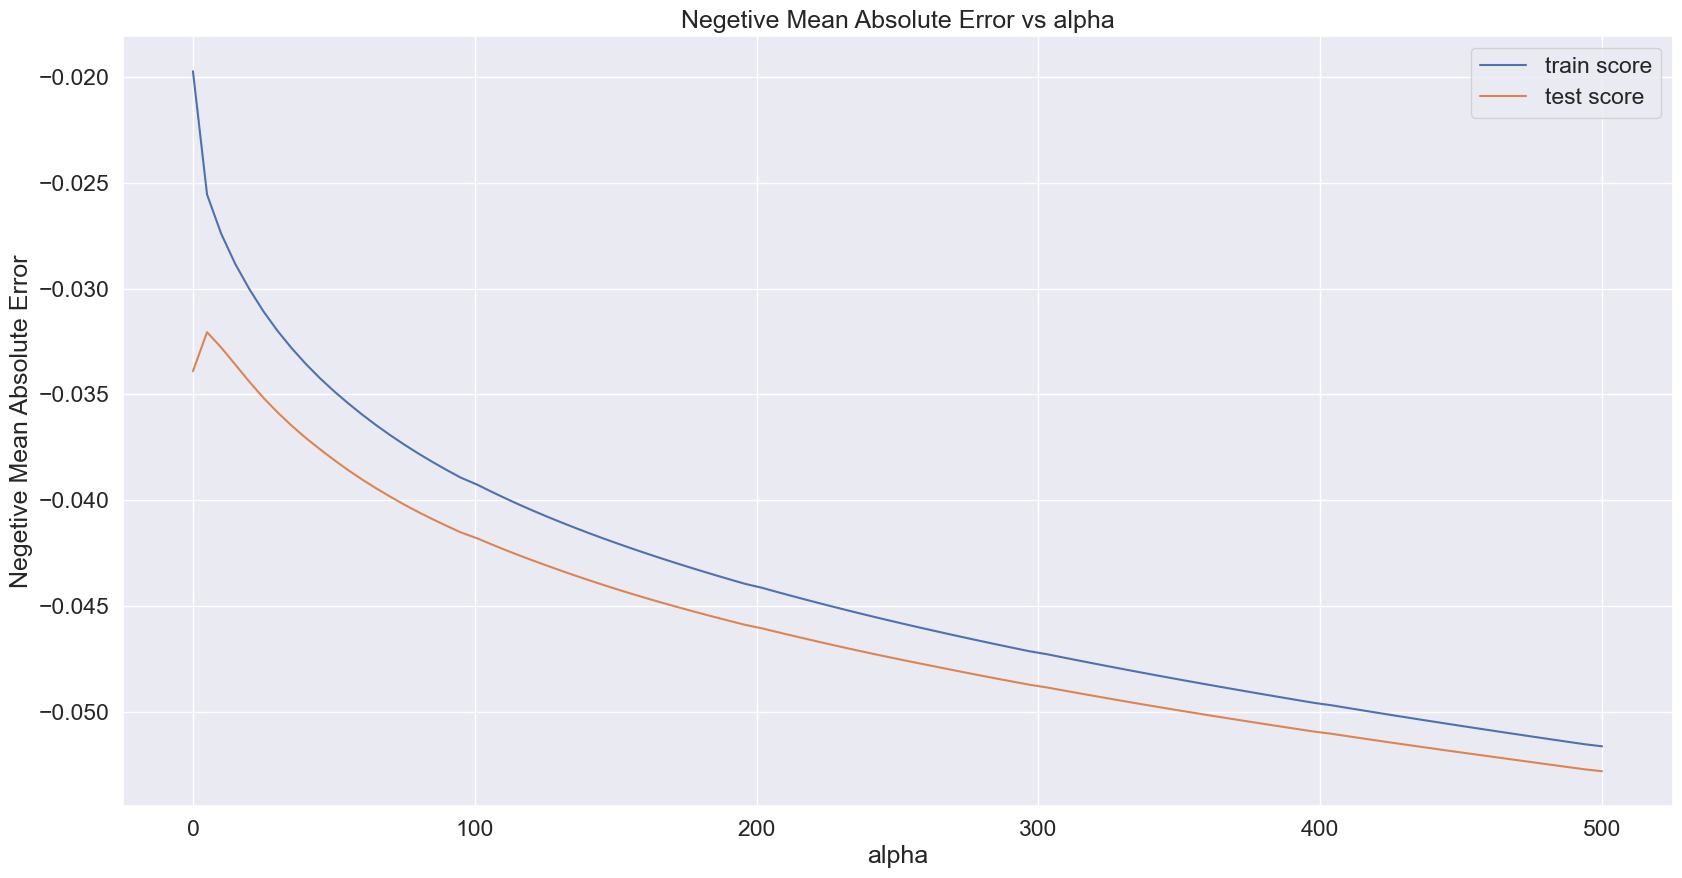

In [83]:
#typecasting param_alpha to int
cv_results_r['param_alpha'] = cv_results_r['param_alpha'].astype('int32')

#plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_train_score'])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negetive Mean Absolute Error')
plt.title('Negetive Mean Absolute Error vs alpha')
plt.legend(['train score', 'test score'],loc = 'upper right')
plt.show()

In [84]:
print(model_cv_r.best_params_)
print(model_cv_r.best_score_)

{'alpha': 5.06040404040404}
-0.03206011938936439


In [85]:
#final ridge model
alpha = 56
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.38067055e-02,  7.36512437e-03, -4.63222336e-04,  1.28014112e-03,
        3.88364023e-02,  1.91996990e-02,  6.58923008e-03,  2.79699489e-02,
        1.21796139e-02,  9.16719496e-03,  4.64680141e-03,  1.31768595e-02,
        1.43629685e-02,  1.72604155e-02,  2.24054313e-02,  2.71351588e-02,
        5.49936576e-03,  2.85579360e-02,  1.49328612e-02, -2.53607716e-04,
        2.79915106e-02,  1.57233402e-02,  1.58922772e-02,  4.64659207e-04,
        3.44194988e-02,  1.69655565e-02,  7.90678834e-03,  3.02121984e-02,
        2.47289639e-02,  1.34593257e-02,  8.07390375e-03,  4.31168079e-03,
        2.31165306e-03,  1.18251613e-02, -8.94632560e-04, -4.01550818e-04,
        2.11013900e-03, -5.04631055e-03,  2.85049473e-03,  1.86990825e-03,
        1.56385419e-02, -1.32405741e-02, -4.31917688e-03,  6.89958843e-03,
        9.48092461e-03, -3.73966760e-03, -6.53148597e-03,  4.55101815e-03,
        1.97941510e-03,  4.68580607e-03,  8.37766838e-03, -5.71258045e-03,
       -5.74104340e-04, -

In [86]:
#y_train_predict
y_train_pred = ridge.predict(X_train)
#training r2 score
print('training R-square value',r2_score(y_true=y_train,y_pred=y_train_pred))

training R-square value 0.853597051995512


In [87]:
#training Adjusted r2 value for ridge regression
r2_ridge = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
n = len(X_train)
k= X_train.shape[1]
adjusted_r2 = 1 - ((1-r2_ridge)*(n-1)/(n-k-1))
adjusted_r2

0.8037700302699371

In [88]:
#test dataset r2 score
#y_test_predict
y_test_pred = ridge.predict(X_test)
print('test R-square value',r2_score(y_true=y_test,y_pred=y_test_pred))

test R-square value 0.8419056546105141


### Lasso Regression:

In [89]:
params = {'alpha':np.linspace(0.000001, 2,100)}

In [90]:
# Creating laaso object
lasso = Lasso()

# using cross validation
folds = 10
model_cv_l = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

#training the model-learning coefficients
model_cv_l.fit(X_train_rfe, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 2.02030101e-02, 4.04050202e-02, 6.06070303e-02,
       8.08090404e-02, 1.01011051e-01, 1.21213061e-01, 1.41415071e-01,
       1.61617081e-01, 1.81819091e-01, 2.02021101e-01, 2.22223111e-01,
       2.42425121e-01, 2.62627131e-01, 2.82829141e-01, 3.03031152e-01,
       3.23233162e-01, 3.43435172e-01, 3.63637182e-01, 3...
       1.61616181e+00, 1.63636382e+00, 1.65656583e+00, 1.67676784e+00,
       1.69696985e+00, 1.71717186e+00, 1.73737387e+00, 1.75757588e+00,
       1.77777789e+00, 1.79797990e+00, 1.81818191e+00, 1.83838392e+00,
       1.85858593e+00, 1.87878794e+00, 1.89898995e+00, 1.91919196e+00,
       1.93939397e+00, 1.95959598e+00, 1.97979799e+00, 2.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
#creating results dataframe
cv_results = pd.DataFrame(model_cv_l.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009116      0.004152         0.001518        0.000630    0.000001   
1       0.002674      0.000993         0.002242        0.002199    0.020203   
2       0.001649      0.000331         0.000877        0.000154    0.040405   
3       0.001783      0.000310         0.001022        0.000350    0.060607   
4       0.001315      0.000081         0.000731        0.000085    0.080809   

                            params  split0_test_score  split1_test_score  \
0                 {'alpha': 1e-06}          -0.081923          -0.072629   
1  {'alpha': 0.020203010101010103}          -0.109049          -0.101241   
2  {'alpha': 0.040405020202020206}          -0.109049          -0.101241   
3   {'alpha': 0.06060703030303031}          -0.109049          -0.101241   
4   {'alpha': 0.08080904040404041}          -0.109049          -0.101241   

   split2_test_score  split3_test_score  split4_test_score  split5_test_score  \
0          -0.085544          -0.074347          -0.079253          -0.075490   
1          -0.103602          -0.100209          -0.103439          -0.100333   
2          -0.103602          -0.100209          -0.103439          -0.100333   
3          -0.103602          -0.100209          -0.103439          -0.100333   
4          -0.103602          -0.100209          -0.103439          -0.100333   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  \
0          -0.072953          -0.072535          -0.094813          -0.073951   
1          -0.094337          -0.093956          -0.089949          -0.094829   
2          -0.094337          -0.093956          -0.089949          -0.094829   
3          -0.094337          -0.093956          -0.089949          -0.094829   
4          -0.094337          -0.093956          -0.089949          -0.094829   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.078344        0.006896                1           -0.072881   
1        -0.099094        0.005446                2           -0.097800   
2        -0.099094        0.005446                2           -0.097800   
3        -0.099094        0.005446                2           -0.097800   
4        -0.099094        0.005446                2           -0.097800   

   split1_train_score  split2_train_score  split3_train_score  \
0           -0.073850           -0.073846           -0.073598   
1           -0.098786           -0.098623           -0.098947   
2           -0.098786           -0.098623           -0.098947   
3           -0.098786           -0.098623           -0.098947   
4           -0.098786           -0.098623           -0.098947   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.073046           -0.073593           -0.073851   
1           -0.098641           -0.098971           -0.099581   
2           -0.098641           -0.098971           -0.099581   
3           -0.098641           -0.098971           -0.099581   
4           -0.098641           -0.098971           -0.099581   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.073825           -0.074702           -0.073708   
1           -0.099626           -0.100086           -0.099472   
2           -0.099626           -0.100086           -0.099472   
3           -0.099626           -0.100086           -0.099472   
4           -0.099626           -0.100086           -0.099472   

   mean_train_score  std_train_score  
0         -0.073690         0.000470  
1         -0.099053         0.000622  
2         -0.099053         0.000622  
3         -0.099053         0.000622  
4         -0.099053         0.000622

In [92]:
#all the feature names 
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

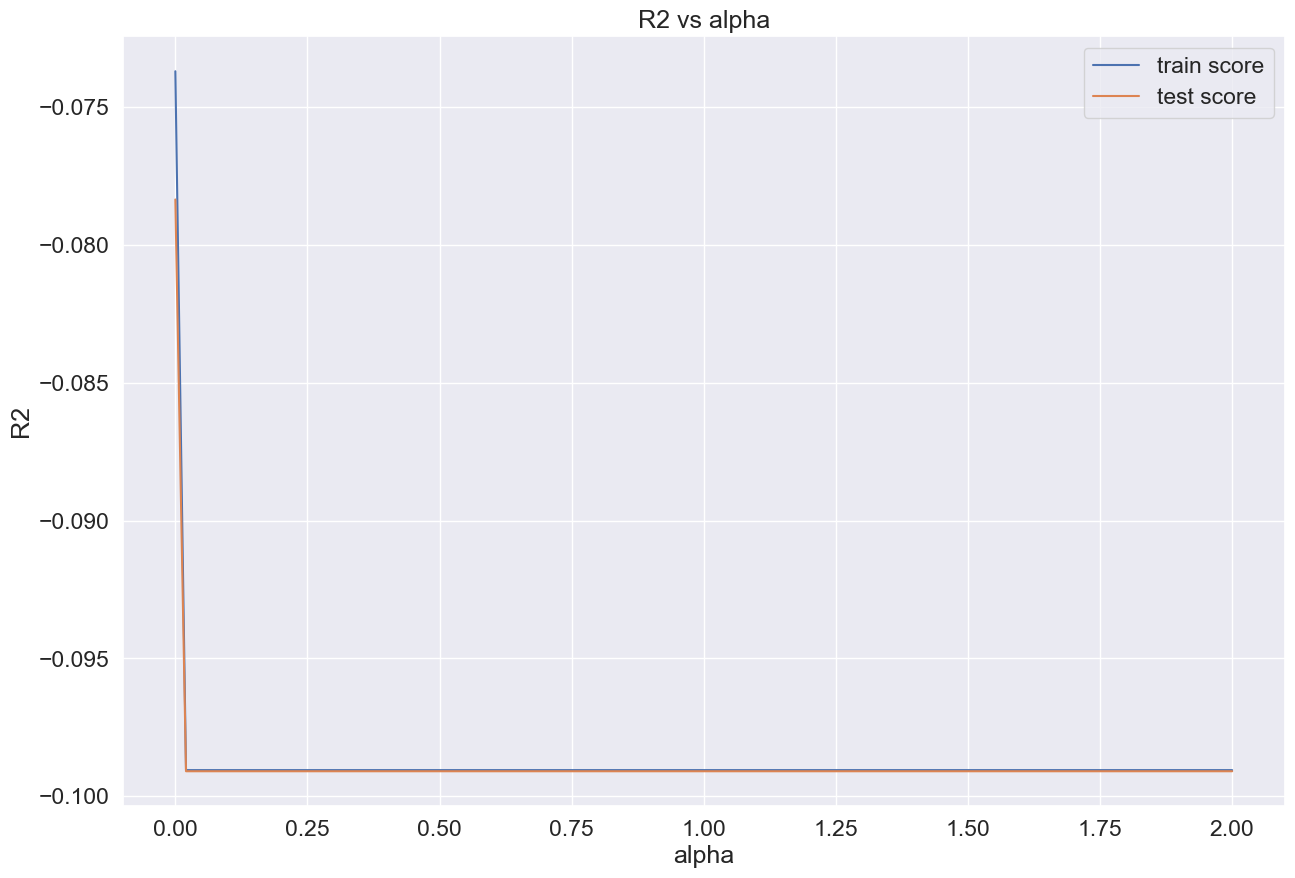

In [93]:
# plotting mean test and train scoes with alpha
#typecasting param_alpha to float dtype
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(15,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [94]:
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 1e-06}
-0.07834369317073178


In [106]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [107]:
lasso.coef_

array([-0.01541063,  0.        , -0.        ,  0.        ,  0.21853238,
        0.01576002,  0.        ,  0.03519465,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.02003478,  0.        ,
        0.00833872,  0.        ,  0.14591884,  0.01882914,  0.        ,
        0.0078133 ,  0.00290807,  0.        , -0.        ,  0.08907548,
        0.        ,  0.        ,  0.10215289,  0.00389243,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.00261043, -0.02419365, -0.        ,  0.        ,  0.        ,
       -0.        , -0.00724216,  0.        ,  0.        ,  0.        ,
        0.00275029, -0.        , -0.        , -0.00220566,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.01665704, -0.00862685, -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.  

In [108]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print('Training R-squared value: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Training R-squared value:  0.8574451207374848


In [109]:
#ajusted r2 for training dataset(lasso)
r2_lasso = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
n = len(X_train)
k= X_train.shape[1]
adjusted_r2 = 1 - (((1-r2_lasso)*(n-1))/(n-k-1))
adjusted_r2

0.8089277570988627

In [110]:
#Predict the R-squared value for Test data
y_test_pred = lasso.predict(X_test)
print('Test R-squared value:',metrics.r2_score(y_true=y_test,y_pred = y_test_pred))

Test R-squared value: 0.8606422194958753


In [111]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

0.002592309514744764

In [101]:
model_params = list(lasso.coef_)
model_params.insert(0,lasso.intercept_)
features = lasso.feature_names_in_
lasso_coef = pd.DataFrame(list(zip(features,model_params)), columns=['Feature','Coef'])

In [102]:
lasso_coef.sort_values(by='Coef', ascending=False, ignore_index=True).head(20)

Feature      Coef
0                 MSSubClass  0.291291
1                OverallCond  0.212235
2                 GarageArea  0.108220
3                 Fireplaces  0.096904
4                 MasVnrArea  0.037539
5            BsmtExposure_Mn  0.020289
6               LowQualFinSF  0.019079
7         GarageType_Basment  0.014751
8           BsmtFinType1_LwQ  0.013652
9            Foundation_Slab  0.011653
10                  1stFlrSF  0.010983
11               MSZoning_RM  0.008771
12           BsmtExposure_Gd  0.005614
13              PavedDrive_P  0.001728
14  FireplaceQu_No_Fireplace  0.000346
15           Condition1_PosA  0.000149
16          BsmtFinType2_Rec -0.000000
17              Heating_GasW -0.000000
18               BsmtQual_TA -0.000000
19               BsmtCond_Gd -0.000000

### Summary
The importanf features based on lasso model

- MSSubClass
- OverallCond
- GarageArea
- Fireplaces
- MasVnrArea
- BsmtExposure_Mn
- LowQualFinSF
- GarageType_Basment
- BsmtFinType1_LwQ
- Foundation_Slab

The important features based on RFE
- GarageQual_No_Garage
- MiscFeature_Othr
- BsmtFinType2_No_Basement
- RoofMatl_Membran
- BsmtFinType1_No_Basement
- GarageType_No_Garage
- GarageFinish_No_Garage
- RoofStyle_Shed
- PoolArea
- PoolArea